# 12. 최종 논문용 Figure 생성

## 목적
MatterGen 결과를 포함한 최종 논문용 Figure를 생성합니다.

---

### 생성할 Figure

- **Fig 5**: 전체 연구 파이프라인 개요
- **Fig 6**: MatterGen vs Industrial Waste 비교
- **Fig 7**: 최종 권장 사항 및 결론

In [1]:
import sys
from pathlib import Path
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import matplotlib.gridspec as gridspec

# 스타일 설정
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['figure.dpi'] = 150

# 경로 설정
PROJECT_ROOT = Path.cwd().parent.parent
RESULTS_DIR = PROJECT_ROOT / 'data' / 'results'
FIGURES_DIR = PROJECT_ROOT / 'figures' / 'paper'
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

print(f"Figures will be saved to: {FIGURES_DIR}")

Figures will be saved to: c:\cement_final\figures\paper


In [2]:
# 데이터 로딩
with open(RESULTS_DIR / 'top_candidates.json') as f:
    top5_data = json.load(f)

with open(RESULTS_DIR / 'mattergen_validation.json') as f:
    mattergen_data = json.load(f)

# final_comparison.json이 있으면 로드
final_comparison_path = RESULTS_DIR / 'final_comparison.json'
if final_comparison_path.exists():
    with open(final_comparison_path) as f:
        final_data = json.load(f)
else:
    final_data = None

print("Data loaded")

Data loaded


## Figure 5: 연구 파이프라인 개요

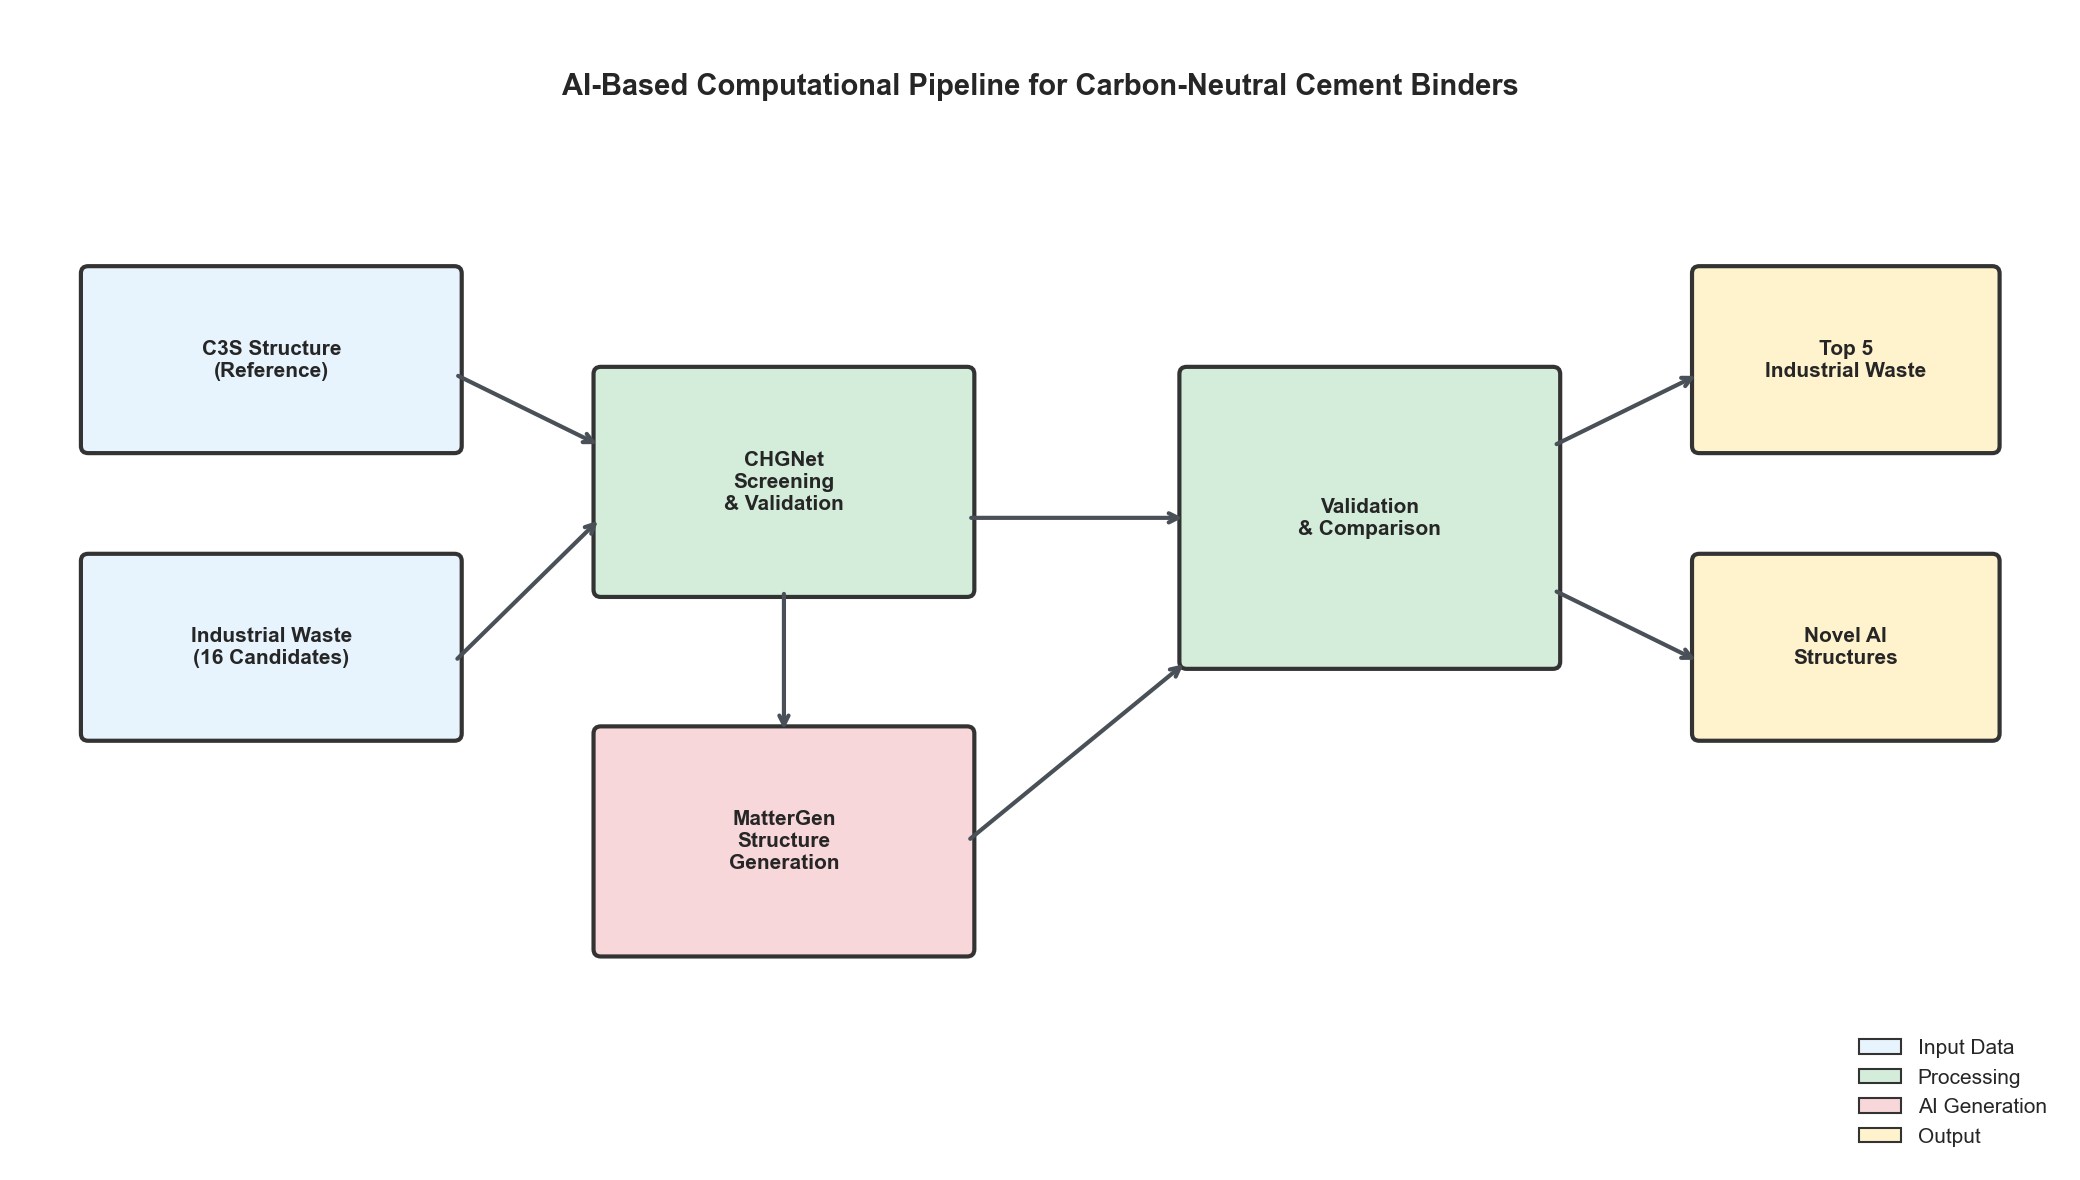

Fig 5 saved


In [3]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(0, 14)
ax.set_ylim(0, 8)
ax.axis('off')

# 색상 정의
colors = {
    'input': '#E8F4FD',
    'process': '#D4EDDA',
    'ai': '#F8D7DA',
    'output': '#FFF3CD',
    'arrow': '#495057'
}

def draw_box(ax, x, y, w, h, text, color, fontsize=10):
    box = FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.05",
                         facecolor=color, edgecolor='#333', linewidth=2)
    ax.add_patch(box)
    ax.text(x + w/2, y + h/2, text, ha='center', va='center',
            fontsize=fontsize, fontweight='bold', wrap=True)

def draw_arrow(ax, x1, y1, x2, y2):
    ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle='->', color=colors['arrow'], lw=2))

# 타이틀
ax.text(7, 7.5, 'AI-Based Computational Pipeline for Carbon-Neutral Cement Binders',
        ha='center', va='center', fontsize=14, fontweight='bold')

# Phase 1: 입력
draw_box(ax, 0.5, 5, 2.5, 1.2, 'C3S Structure\n(Reference)', colors['input'])
draw_box(ax, 0.5, 3, 2.5, 1.2, 'Industrial Waste\n(16 Candidates)', colors['input'])

# Phase 2: CHGNet 분석
draw_box(ax, 4, 4, 2.5, 1.5, 'CHGNet\nScreening\n& Validation', colors['process'])
draw_arrow(ax, 3, 5.5, 4, 5)
draw_arrow(ax, 3, 3.5, 4, 4.5)

# Phase 3: MatterGen
draw_box(ax, 4, 1.5, 2.5, 1.5, 'MatterGen\nStructure\nGeneration', colors['ai'])
draw_arrow(ax, 5.25, 4, 5.25, 3)

# Phase 4: 검증
draw_box(ax, 8, 3.5, 2.5, 2, 'Validation\n& Comparison', colors['process'])
draw_arrow(ax, 6.5, 4.5, 8, 4.5)
draw_arrow(ax, 6.5, 2.25, 8, 3.5)

# Phase 5: 출력
draw_box(ax, 11.5, 5, 2, 1.2, 'Top 5\nIndustrial Waste', colors['output'])
draw_box(ax, 11.5, 3, 2, 1.2, 'Novel AI\nStructures', colors['output'])
draw_arrow(ax, 10.5, 5, 11.5, 5.5)
draw_arrow(ax, 10.5, 4, 11.5, 3.5)

# 범례
legend_elements = [
    mpatches.Patch(facecolor=colors['input'], edgecolor='#333', label='Input Data'),
    mpatches.Patch(facecolor=colors['process'], edgecolor='#333', label='Processing'),
    mpatches.Patch(facecolor=colors['ai'], edgecolor='#333', label='AI Generation'),
    mpatches.Patch(facecolor=colors['output'], edgecolor='#333', label='Output')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

# 저장
plt.tight_layout()
fig.savefig(FIGURES_DIR / 'Fig5_Pipeline_Overview.png', dpi=300, bbox_inches='tight')
fig.savefig(FIGURES_DIR / 'Fig5_Pipeline_Overview.pdf', bbox_inches='tight')
plt.show()

print("Fig 5 saved")

## Figure 6: MatterGen vs Industrial Waste 비교

C:\Users\ACER\AppData\Local\Temp\ipykernel_32800\2052834442.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


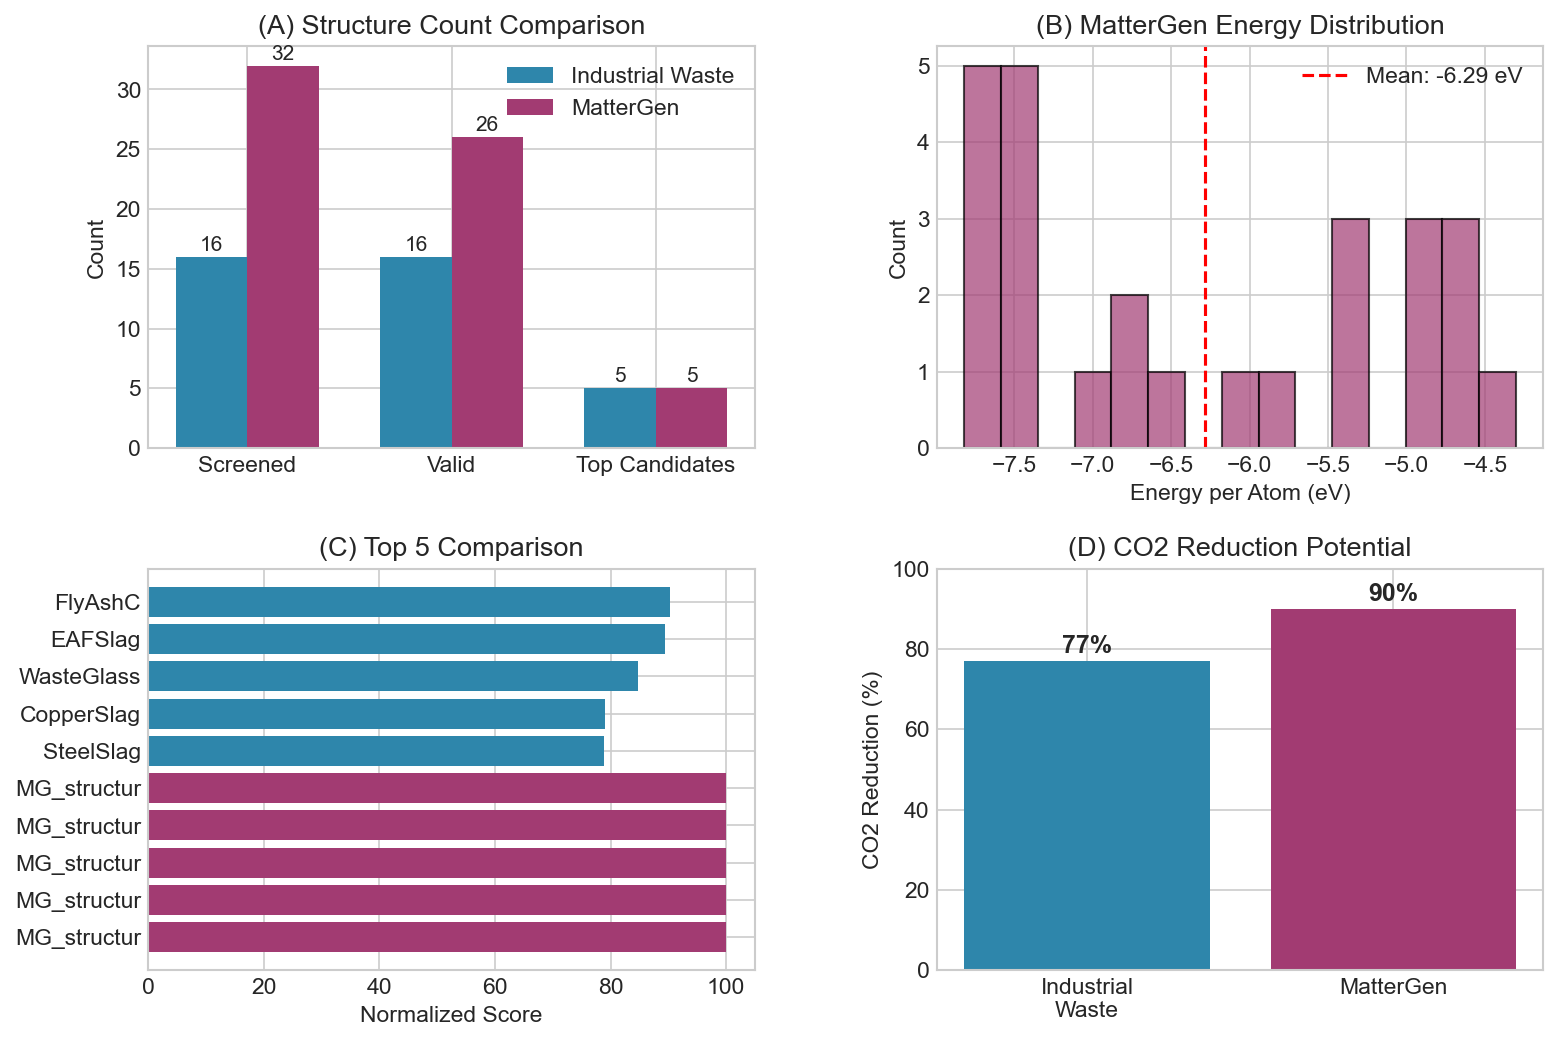

Fig 6 saved


In [4]:
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], hspace=0.3, wspace=0.3)

# 색상
iw_color = '#2E86AB'
mg_color = '#A23B72'

# (A) 구조 개수 비교
ax1 = fig.add_subplot(gs[0, 0])
categories = ['Screened', 'Valid', 'Top Candidates']
iw_counts = [16, 16, 5]
mg_counts = [mattergen_data['total_generated'], 
             mattergen_data['valid_composition'],
             mattergen_data['optimized_count']]

x = np.arange(len(categories))
width = 0.35

bars1 = ax1.bar(x - width/2, iw_counts, width, label='Industrial Waste', color=iw_color)
bars2 = ax1.bar(x + width/2, mg_counts, width, label='MatterGen', color=mg_color)

ax1.set_ylabel('Count')
ax1.set_title('(A) Structure Count Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.legend()

for bar in bars1:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             str(int(bar.get_height())), ha='center', fontsize=10)
for bar in bars2:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             str(int(bar.get_height())), ha='center', fontsize=10)

# (B) 에너지 분포
ax2 = fig.add_subplot(gs[0, 1])
mg_energies = [r['energy_per_atom'] for r in mattergen_data['all_results'] if 'energy_per_atom' in r]
ax2.hist(mg_energies, bins=15, color=mg_color, alpha=0.7, edgecolor='black')
ax2.axvline(x=np.mean(mg_energies), color='red', linestyle='--', label=f'Mean: {np.mean(mg_energies):.2f} eV')
ax2.set_xlabel('Energy per Atom (eV)')
ax2.set_ylabel('Count')
ax2.set_title('(B) MatterGen Energy Distribution')
ax2.legend()

# (C) Top 5 비교 (점수)
ax3 = fig.add_subplot(gs[1, 0])
iw_names = [d['name'] for d in top5_data['details']]
iw_scores = [d['score'] for d in top5_data['details']]

mg_names = [f"MG_{r['name'][:8]}" for r in mattergen_data['all_results'][:5]]
# 에너지 기반 정규화 점수
mg_scores = [100 + (r['energy_per_atom'] + 8) * 12.5 for r in mattergen_data['all_results'][:5]]
mg_scores = [max(50, min(100, s)) for s in mg_scores]

all_names = iw_names + mg_names
all_scores = iw_scores + mg_scores
all_colors = [iw_color]*5 + [mg_color]*5

y_pos = np.arange(len(all_names))
ax3.barh(y_pos, all_scores, color=all_colors)
ax3.set_yticks(y_pos)
ax3.set_yticklabels(all_names)
ax3.set_xlabel('Normalized Score')
ax3.set_title('(C) Top 5 Comparison')
ax3.invert_yaxis()

# (D) CO2 저감 비교
ax4 = fig.add_subplot(gs[1, 1])
sources = ['Industrial\nWaste', 'MatterGen']
co2_values = [
    np.mean([d['co2_reduction'] for d in top5_data['details']]),
    90  # MatterGen = 클링커 없음
]

bars = ax4.bar(sources, co2_values, color=[iw_color, mg_color])
ax4.set_ylabel('CO2 Reduction (%)')
ax4.set_title('(D) CO2 Reduction Potential')
ax4.set_ylim(0, 100)

for bar, val in zip(bars, co2_values):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{val:.0f}%', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
fig.savefig(FIGURES_DIR / 'Fig6_MatterGen_Comparison.png', dpi=300, bbox_inches='tight')
fig.savefig(FIGURES_DIR / 'Fig6_MatterGen_Comparison.pdf', bbox_inches='tight')
plt.show()

print("Fig 6 saved")

## Figure 7: 최종 권장 사항

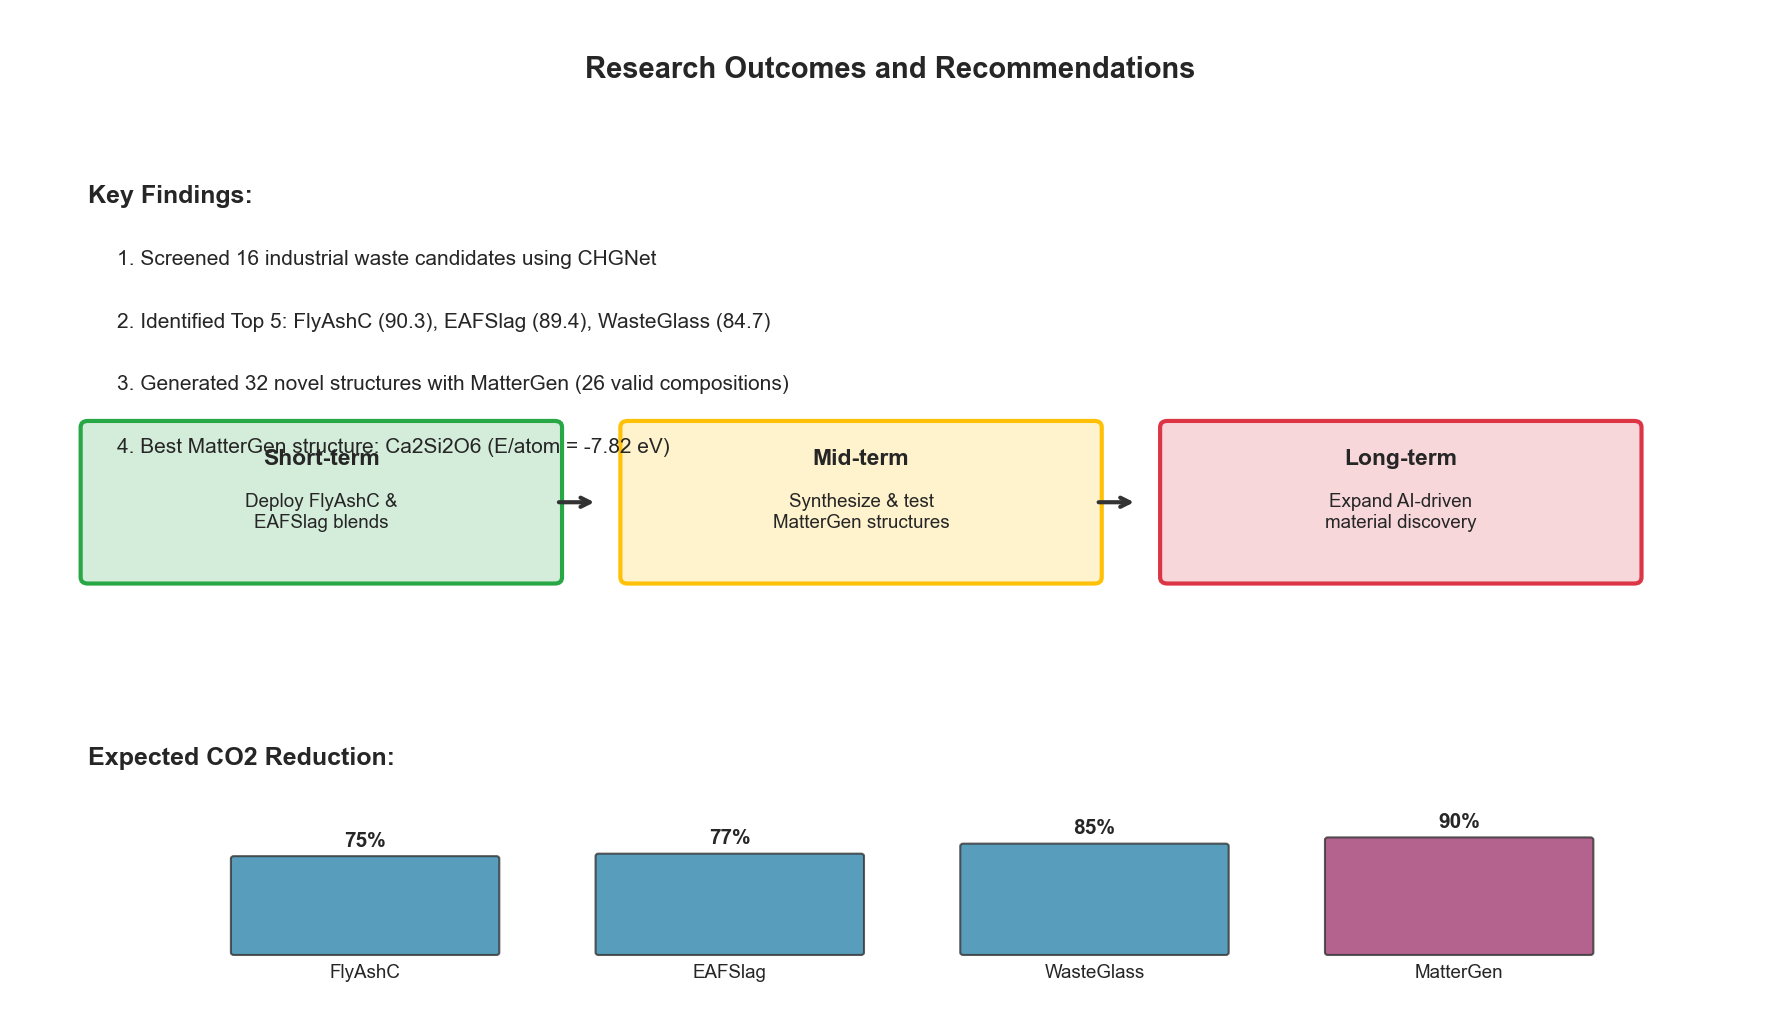

Fig 7 saved


In [5]:
fig, ax = plt.subplots(figsize=(12, 7))

# 타임라인 형식
ax.set_xlim(0, 12)
ax.set_ylim(0, 8)
ax.axis('off')

# 타이틀
ax.text(6, 7.5, 'Research Outcomes and Recommendations',
        ha='center', fontsize=14, fontweight='bold')

# 섹션 1: 주요 결과
ax.text(0.5, 6.5, 'Key Findings:', fontsize=12, fontweight='bold')
findings = [
    '1. Screened 16 industrial waste candidates using CHGNet',
    '2. Identified Top 5: FlyAshC (90.3), EAFSlag (89.4), WasteGlass (84.7)',
    '3. Generated 32 novel structures with MatterGen (26 valid compositions)',
    '4. Best MatterGen structure: Ca2Si2O6 (E/atom = -7.82 eV)'
]
for i, f in enumerate(findings):
    ax.text(0.7, 6 - i*0.5, f, fontsize=10)

# 섹션 2: 권장 사항 박스
box_y = 2.8
box_h = 1.0

# 단기
rect1 = FancyBboxPatch((0.5, box_y), 3.2, box_h, boxstyle="round,pad=0.05",
                        facecolor='#D4EDDA', edgecolor='#28A745', linewidth=2)
ax.add_patch(rect1)
ax.text(2.1, box_y + 0.9, 'Short-term', ha='center', fontsize=11, fontweight='bold')
ax.text(2.1, box_y + 0.4, 'Deploy FlyAshC &\nEAFSlag blends', ha='center', fontsize=9)

# 중기
rect2 = FancyBboxPatch((4.2, box_y), 3.2, box_h, boxstyle="round,pad=0.05",
                        facecolor='#FFF3CD', edgecolor='#FFC107', linewidth=2)
ax.add_patch(rect2)
ax.text(5.8, box_y + 0.9, 'Mid-term', ha='center', fontsize=11, fontweight='bold')
ax.text(5.8, box_y + 0.4, 'Synthesize & test\nMatterGen structures', ha='center', fontsize=9)

# 장기
rect3 = FancyBboxPatch((7.9, box_y), 3.2, box_h, boxstyle="round,pad=0.05",
                        facecolor='#F8D7DA', edgecolor='#DC3545', linewidth=2)
ax.add_patch(rect3)
ax.text(9.5, box_y + 0.9, 'Long-term', ha='center', fontsize=11, fontweight='bold')
ax.text(9.5, box_y + 0.4, 'Expand AI-driven\nmaterial discovery', ha='center', fontsize=9)

# 화살표
ax.annotate('', xy=(4, box_y + box_h/2), xytext=(3.7, box_y + box_h/2),
            arrowprops=dict(arrowstyle='->', color='#333', lw=2))
ax.annotate('', xy=(7.7, box_y + box_h/2), xytext=(7.4, box_y + box_h/2),
            arrowprops=dict(arrowstyle='->', color='#333', lw=2))

# 섹션 3: CO2 저감 요약
ax.text(0.5, 2, 'Expected CO2 Reduction:', fontsize=12, fontweight='bold')

# 바 차트 (간단히)
bar_x = [1.5, 4, 6.5, 9]
bar_w = 1.8
bar_h = [0.75, 0.77, 0.85, 0.90]
bar_labels = ['FlyAshC', 'EAFSlag', 'WasteGlass', 'MatterGen']
bar_colors = ['#2E86AB', '#2E86AB', '#2E86AB', '#A23B72']

for x, h, label, color in zip(bar_x, bar_h, bar_labels, bar_colors):
    rect = FancyBboxPatch((x, 0.5), bar_w, h, boxstyle="round,pad=0.02",
                          facecolor=color, edgecolor='#333', alpha=0.8)
    ax.add_patch(rect)
    ax.text(x + bar_w/2, 0.3, label, ha='center', fontsize=9)
    ax.text(x + bar_w/2, 0.5 + h + 0.1, f'{int(h*100)}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
fig.savefig(FIGURES_DIR / 'Fig7_Recommendations.png', dpi=300, bbox_inches='tight')
fig.savefig(FIGURES_DIR / 'Fig7_Recommendations.pdf', bbox_inches='tight')
plt.show()

print("Fig 7 saved")

## Figure 목록 확인

In [6]:
print("Generated Figures:")
print("=" * 50)
for f in sorted(FIGURES_DIR.glob('Fig*')):
    size_kb = f.stat().st_size / 1024
    print(f"  {f.name} ({size_kb:.1f} KB)")

Generated Figures:
  Fig1_Pipeline_Overview.pdf (19.8 KB)
  Fig1_Pipeline_Overview.png (162.8 KB)
  Fig2_Screening_Results.pdf (37.5 KB)
  Fig2_Screening_Results.png (347.8 KB)
  Fig3_CSH_formation.png (14.8 KB)
  Fig3_Top5_Comparison.pdf (41.7 KB)
  Fig3_Top5_Comparison.png (487.4 KB)
  Fig4_Molecular_Analysis.pdf (43.8 KB)
  Fig4_Molecular_Analysis.png (647.4 KB)
  Fig5_Pipeline_Overview.pdf (26.1 KB)
  Fig5_Pipeline_Overview.png (223.4 KB)
  Fig6_MatterGen_Comparison.pdf (27.4 KB)
  Fig6_MatterGen_Comparison.png (270.2 KB)
  Fig7_Recommendations.pdf (36.7 KB)
  Fig7_Recommendations.png (238.9 KB)
  FigS1_Correlation_Heatmap.pdf (28.2 KB)
  FigS1_Correlation_Heatmap.png (150.0 KB)


---

## 요약

### 생성된 Figure

| Figure | 내용 | 파일 |
|--------|------|------|
| Fig 5 | 연구 파이프라인 개요 | Fig5_Pipeline_Overview.png/pdf |
| Fig 6 | MatterGen vs Industrial Waste 비교 | Fig6_MatterGen_Comparison.png/pdf |
| Fig 7 | 최종 권장 사항 | Fig7_Recommendations.png/pdf |

### 기존 Figure (1-4)

- Fig 1: Pipeline Overview (기존)
- Fig 2: Screening Results (기존)
- Fig 3: Top 5 Comparison (기존)
- Fig 4: Molecular Analysis (기존)